In [1]:
import numpy, random, math
from scipy.optimize import minimize
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
numpy.random.seed(100)
classA = numpy.concatenate(
    (numpy.random.randn(10,2) * 0.2+[1.5, 0.5],
    numpy.random.randn(10,2) * 0.2+[-1.5, 0.5]))

#classB = numpy.concatenate(
#    (numpy.random.randn(10,2) * 0.2+[0.0, -0.5],
#    numpy.random.randn(10,2) * 0.2+[0.0, 0.5]))

classB = numpy.random.randn(20,2) * 0.2+[0.0, -0.5]

inputs = numpy.concatenate((classA, classB))
targets = numpy.concatenate((numpy.ones(classA.shape[0]), -numpy.ones(classB.shape[0])))

N = inputs.shape[0] # number of rows /samples

permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
target = targets[permute]

In [3]:
#A suitable kernel function
#The kernel function takes two data points as arguments and returns a
#“scalar product-like” similarity measure; a scalar value. Start with the
#linear kernel which is the same as an ordinary scalar product, but also
#explore the other kernels in section 3.3.

def linearK(vector1, vector2):
    return numpy.dot(vector1, vector2)

def polynomialK(vector1, vector2):
    result = (numpy.dot(vector1, vector2)+1)**5
    return result
u=0.5
def rbfK(vector1, vector2):
    dis = distance.euclidean(vector1, vector2)
    power = (-1*dis)/(2*(u**2))
    return math.e**power

Kernel = linearK

In [4]:
data = numpy.zeros(shape=(40,40))
for i in range(len(inputs)):
    for j in range(len(inputs)):
        data[i][j] = target[i]*target[j]*Kernel(inputs[i],inputs[j])

In [5]:
#Implement the function objective

def objective(vector):
    a = numpy.sum(vector)
    #total = float
    #counter = 0    
#    for i in vector:
#        total + = numpy.dot(vector, data)
#        counter +=1
    total = numpy.dot(vector, data)
    print(total)
    print(type(total))
    total = numpy.sum(total)
    return total/2-a
    
def objective2(vector):
    temp = 0
    a = numpy.sum (vector)
    for i in range(N):
        for j in range(N):
            temp += vector [i] * vector[j] * data[i,j]
    return temp/2-a
#x_j, t_j and alpha_j are the j:th datapoint/feature vector, the j:th label, and the j:th alpha value, respectively.
            

#The first term of equation (4) would then be 0.5 multiplied by the sum of all elements of the matrix of 
#np.outer( t*alpha, (t*alpha).T ) * ker(x), where ker is some kernel function and x is the matrix of the feature vectors.


In [6]:
#Implement the function zerofun
#This function should implement the equality constraint of (10). Also here,
#you can make use of numpy.dot to be efficient.
def zerofun(vector):
    return numpy.dot(vector, target)

In [7]:
XC = {'type':'eq', 'fun':zerofun}

In [8]:
C = None
start = numpy.zeros(N) 
B = [(0, C) for b in start]

In [9]:
ret = minimize (objective2, start, bounds=B, constraints=XC)
alpha = ret.x
print(alpha)
result = ret["success"]
print(result)
#ret.hess_inv
print(ret.success)
print(ret.nit)

[0.00000000e+00 5.60168331e-15 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.20410342e+01 1.66652405e-14 0.00000000e+00 1.42238619e-14
 0.00000000e+00 9.83637187e-15 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.57430938e-16 0.00000000e+00 1.98501475e-14
 0.00000000e+00 0.00000000e+00 7.89022186e+00 0.00000000e+00
 3.04542149e-14 0.00000000e+00 0.00000000e+00 2.26995350e-14
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.15081239e+00 2.61621712e-15 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.59739237e-16 1.09368403e-14 0.00000000e+00]
True
True
23


In [10]:
a_list = []
x_list = []
t_list = []
threshold = 10**(-5)
for i in range(len(alpha)):
    #print(alpha[i])
    if alpha[i] >= threshold:
        a_list.append(alpha[i])
        x_list.append(inputs[i])
        t_list.append(target[i])

In [11]:
print(a_list)

[12.041034249800619, 7.890221856949874, 4.150812392850712]


In [12]:
#Calculate the b value using equation (7). Note that you must use a point on the margin. This corresponds to a
#point with an -value larger than zero, but less than C (if slack is used).

#support_vector = []
#for i in range(len(a_list)):  #fidning a point with alpha less than C
#    if C != None and a_list[i]<C:
#        support_vector = x_list[i]
#        break
support_vector = x_list[0]        
bias = 0  
for i in range(len(a_list)):
    k = Kernel(support_vector, x_list[i])
    temp = a_list[i]*t_list[i]*k
    temp = temp.item()
    bias += temp
bias = bias - t_list[0]   

In [13]:
#Implement the indicator function
def indicator(new_1, new_2):
    temp = 0
    for i in range(len(a_list)):
        temp += a_list[i]*t_list[i]*Kernel(numpy.array([new_1, new_2]), x_list[i])
    result = temp - bias
    return result

Text(0.5, 1.0, 'Linear kernel, N=40, C=2')

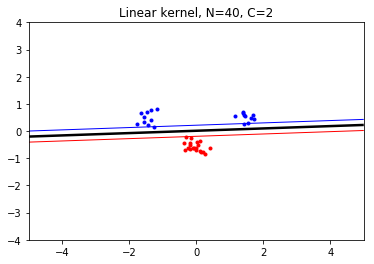

In [14]:
#6 Plotting
plt.plot([p[0] for p in classA], 
         [p[1] for p in classA],
         "b.")
plt.plot([p[0] for p in classB], 
         [p[1] for p in classB], 
         "r.")
#plt.axis("equal") # Force same s c a l e on both axes
#plt.savefig("svm1plot.pdf") # Save a copy in a file
#plt.show() # Show the plot on thescreen
#Plotting the Decision Boundary
xgrid = numpy.linspace(-5, 5)
ygrid = numpy.linspace(-4, 4)
grid = numpy.array([[indicator(x,y)
                    for x in xgrid]
                    for y in ygrid])
plt.contour(xgrid, ygrid, grid,
            (-1.0, 0.0, 1.0),
            colors = ("red", "black", "blue"),
            linewidths = (1, 2.5, 1))
plt.title("Linear kernel, N=40, C=2")